/Users/mallick/miniconda3/envs/bemcs/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


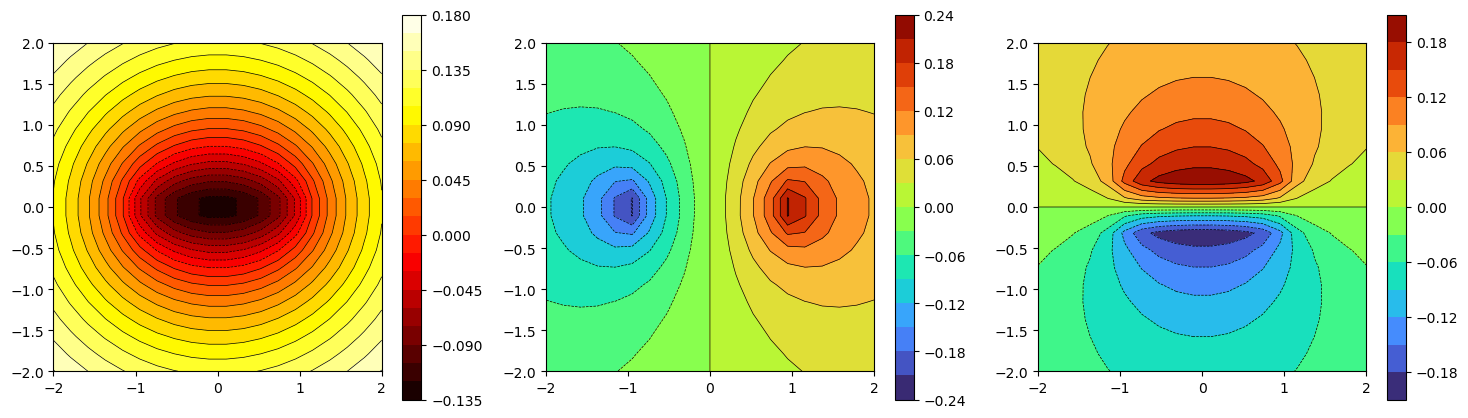

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import bemcs
import quadpy


Rx = 2.0
Ry = 0.5

p1 = np.array([-Rx / 2, -Ry / 2])
p2 = np.array([Rx / 2, -Ry / 2])
p3 = np.array([Rx / 2, Ry / 2])
p4 = np.array([-Rx / 2, Ry / 2])


# plotting points
nx = 20
ny = 20
xvec = np.linspace(-2, 2, nx)
yvec = np.linspace(-2, 2, ny)
x_obs, y_obs = np.meshgrid(xvec, yvec)

# construct 2 triangles and compute responses
triangle = (np.array([p1, p3, p2]), np.array([p1, p4, p3]))
u = np.zeros(nx * ny)
sx = np.zeros_like(u)
sy = np.zeros_like(u)

for i in range(0, 2):
    uval, sxval, syval = bemcs.displacements_stresses_triangle_force_antiplane(
        triangle[i], x_obs.flatten(), y_obs.flatten()
    )
    u = u + uval
    sx = sx + sxval
    sy = sy + syval

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.contourf(x_obs, y_obs, u.reshape(ny, nx), 19, cmap="hot")
plt.colorbar()
plt.contour(x_obs, y_obs, u.reshape(ny, nx), 19, colors="k", linewidths=0.5)
plt.gca().set_aspect("equal", adjustable="box")
plt.subplot(1, 3, 2)
plt.contourf(x_obs, y_obs, sx.reshape(ny, nx), 15, cmap="turbo")
plt.colorbar()
plt.contour(x_obs, y_obs, sx.reshape(ny, nx), 15, colors="k", linewidths=0.5)
plt.gca().set_aspect("equal", adjustable="box")
plt.subplot(1, 3, 3)
plt.contourf(x_obs, y_obs, sy.reshape(ny, nx), 15, cmap="turbo")
plt.colorbar()
plt.contour(x_obs, y_obs, sy.reshape(ny, nx), 15, colors="k", linewidths=0.5)
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

# Plot results from near-field and far-field

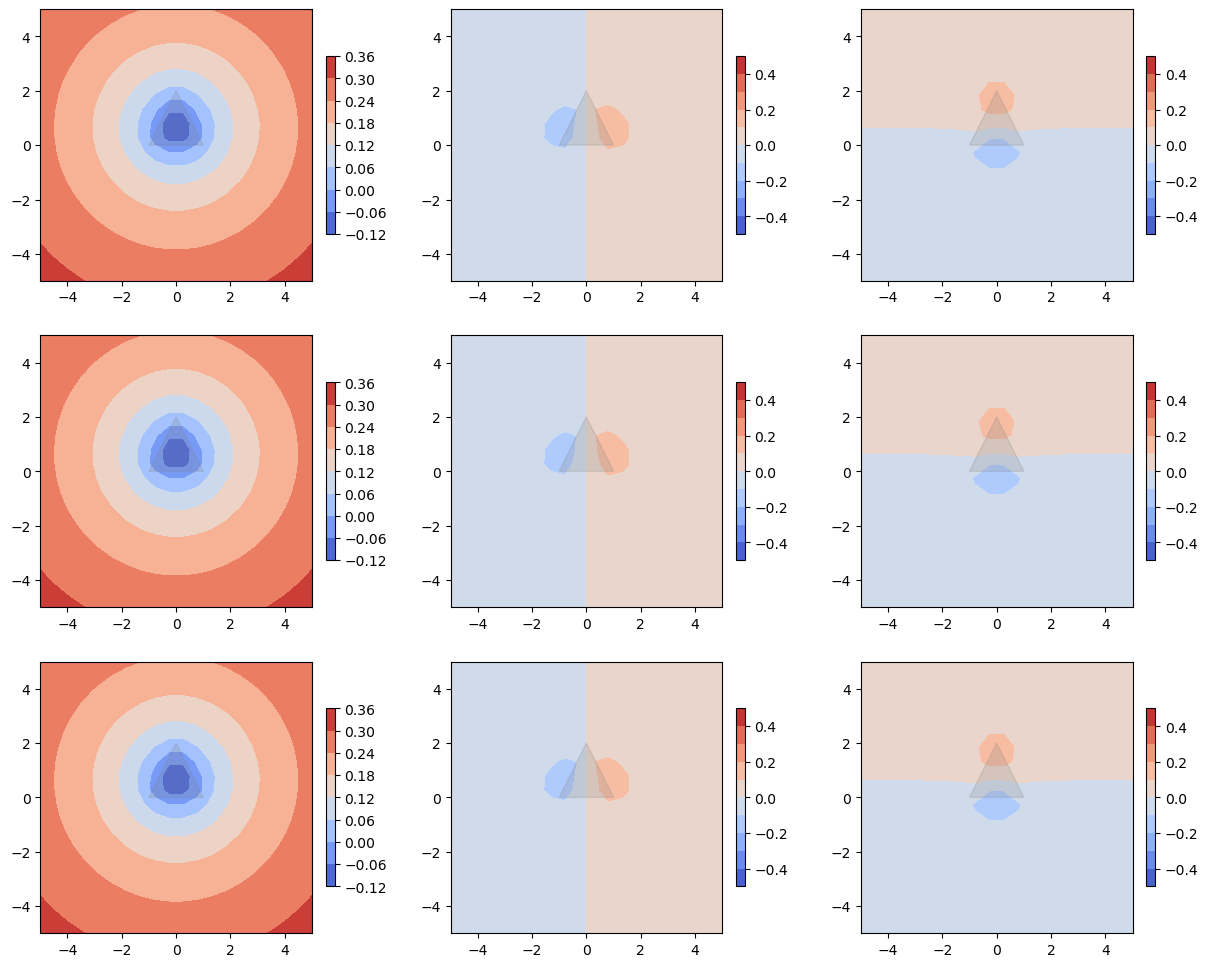

In [ ]:
u_near, sx_near, sy_near = (
    bemcs.displacements_stresses_triangle_force_antiplane_nearfield(
        triangle, x_obs, y_obs
    )
)
u_far, sx_far, sy_far = bemcs.displacements_stresses_triangle_force_antiplane_farfield(
    triangle, x_obs, y_obs
)
# Plot results
levels = np.linspace(-0.5, 0.5, 11)
plt.figure(figsize=(15, 12))
plt.subplot(3, 3, 1)
plt.contourf(
    x_obs.reshape(ny, nx),
    y_obs.reshape(ny, nx),
    u_near.reshape(ny, nx),
    cmap="coolwarm",
)
plt.colorbar(fraction=0.026, pad=0.04, extend="both")
plt.fill(triangle[:, 0], triangle[:, 1], color="gray", alpha=0.2)
plt.gca().set_aspect("equal", adjustable="box")

plt.subplot(3, 3, 2)
plt.contourf(
    x_obs.reshape(ny, nx),
    y_obs.reshape(ny, nx),
    sx_near.reshape(ny, nx),
    cmap="coolwarm",
    levels=levels,
)
plt.colorbar(fraction=0.026, pad=0.04, extend="both")
plt.clim([-0.5, 0.5])
plt.fill(triangle[:, 0], triangle[:, 1], color="gray", alpha=0.2)
plt.gca().set_aspect("equal", adjustable="box")

plt.subplot(3, 3, 3)
plt.contourf(
    x_obs.reshape(ny, nx),
    y_obs.reshape(ny, nx),
    sy_near.reshape(ny, nx),
    cmap="coolwarm",
    levels=levels,
)
plt.colorbar(fraction=0.026, pad=0.04, extend="both")
plt.clim([-0.5, 0.5])
plt.fill(triangle[:, 0], triangle[:, 1], color="gray", alpha=0.2)
plt.gca().set_aspect("equal", adjustable="box")

plt.subplot(3, 3, 4)
plt.contourf(
    x_obs.reshape(ny, nx),
    y_obs.reshape(ny, nx),
    u_far.reshape(ny, nx),
    cmap="coolwarm",
)
plt.colorbar(fraction=0.026, pad=0.04, extend="both")
plt.fill(triangle[:, 0], triangle[:, 1], color="gray", alpha=0.2)
plt.gca().set_aspect("equal", adjustable="box")

plt.subplot(3, 3, 5)
plt.contourf(
    x_obs.reshape(ny, nx),
    y_obs.reshape(ny, nx),
    sx_far.reshape(ny, nx),
    cmap="coolwarm",
    levels=levels,
)
plt.colorbar(fraction=0.026, pad=0.04, extend="both")
plt.clim([-0.5, 0.5])
plt.fill(triangle[:, 0], triangle[:, 1], color="gray", alpha=0.2)
plt.gca().set_aspect("equal", adjustable="box")

plt.subplot(3, 3, 6)
plt.contourf(
    x_obs.reshape(ny, nx),
    y_obs.reshape(ny, nx),
    sy_far.reshape(ny, nx),
    cmap="coolwarm",
    levels=levels,
)
plt.colorbar(fraction=0.026, pad=0.04, extend="both")
plt.clim([-0.5, 0.5])
plt.fill(triangle[:, 0], triangle[:, 1], color="gray", alpha=0.2)
plt.gca().set_aspect("equal", adjustable="box")

plt.subplot(3, 3, 7)
plt.contourf(
    x_obs.reshape(ny, nx),
    y_obs.reshape(ny, nx),
    u.reshape(ny, nx),
    cmap="coolwarm",
)
plt.colorbar(fraction=0.026, pad=0.04, extend="both")
plt.fill(triangle[:, 0], triangle[:, 1], color="gray", alpha=0.2)
plt.gca().set_aspect("equal", adjustable="box")

plt.subplot(3, 3, 8)
plt.contourf(
    x_obs.reshape(ny, nx),
    y_obs.reshape(ny, nx),
    sx.reshape(ny, nx),
    cmap="coolwarm",
    levels=levels,
)
plt.colorbar(fraction=0.026, pad=0.04, extend="both")
plt.clim([-0.5, 0.5])
plt.fill(triangle[:, 0], triangle[:, 1], color="gray", alpha=0.2)
plt.gca().set_aspect("equal", adjustable="box")

plt.subplot(3, 3, 9)
plt.contourf(
    x_obs.reshape(ny, nx),
    y_obs.reshape(ny, nx),
    sy.reshape(ny, nx),
    cmap="coolwarm",
    levels=levels,
)
plt.colorbar(fraction=0.026, pad=0.04, extend="both")
plt.clim([-0.5, 0.5])
plt.fill(triangle[:, 0], triangle[:, 1], color="gray", alpha=0.2)
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

In [12]:
np.shape(np.asarray([[0.0, 0.0], [1.0, 0.0], [0.5, 0.7]]))

(3, 2)